In [82]:
import matplotlib as mpl
import matplotlib.pyplot
import pylab

In [83]:
import numpy
import os

In [84]:
import typing
from collections import namedtuple

image_hit = namedtuple("image_hit",["name","image","dist","label"])

In [85]:
BASE_DIR="./foobar/"

In [86]:
%matplotlib inline

In [87]:
queries = numpy.loadtxt(os.path.join(BASE_DIR,"queries.txt"),dtype=str,converters = {0: lambda x:x.decode("ascii"), 1:int})
query_images = [matplotlib.pyplot.imread(os.path.join(BASE_DIR,"query_images",str(i))) for i,j in queries]

In [105]:
conv = dict([(i, lambda x:x.decode("ascii")) for i in range(10)])#don't care. Only use this once.
best_image_paths = numpy.loadtxt(os.path.join(BASE_DIR, "best_paths_for_display.txt"),
                                 dtype=str,
                                 converters = conv)
best_image_names = numpy.array([[os.path.basename(i) for i in j] for j in best_image_paths])
best_images = [[matplotlib.pyplot.imread(os.path.join(BASE_DIR,"best_images",one_path)) for one_path in hits] for hits in best_image_names]
best_distances = numpy.loadtxt(os.path.join(BASE_DIR,"best_distances.txt"))
best_labels = numpy.loadtxt(os.path.join(BASE_DIR,"best_labels_for_display.txt"))


worst_image_paths = numpy.loadtxt(os.path.join(BASE_DIR, "worst_paths_for_display.txt"),
                                 dtype=str,
                                 converters = conv)
worst_image_names = numpy.array([[os.path.basename(i) for i in j] for j in worst_image_paths])
worst_images = [[matplotlib.pyplot.imread(os.path.join(BASE_DIR,"worst_images",one_path)) for one_path in hits] for hits in worst_image_names]
worst_distances = numpy.loadtxt(os.path.join(BASE_DIR,"worst_distances.txt"))
worst_labels = numpy.loadtxt(os.path.join(BASE_DIR,"worst_labels_for_display.txt"))


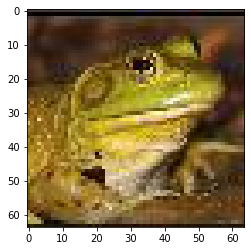

In [89]:
matplotlib.pyplot.imshow(query_images[0])

In [193]:
#image_hit = namedtuple("image_hit",["name","image","dist","label"])

def display_one(query_name,query_image,query_label, best:typing.Sequence[image_hit], worst:typing.Sequence[image_hit]) -> None:
    fig = pylab.figure(figsize=(15,4))
    a = fig.subplots(2,11)
    #BEST
    def do_row(axes,group_name:str, some_hits:typing.Sequence[image_hit]):
        axes[0].imshow(query_image)
        axes[0].set_title("query")
        axes[0].set_xticks([])
        axes[0].set_yticks([])
        axes[0].set_xlabel("class: {:n}".format(int(query_label)))
        
        for i in range(10):
            ax = axes[1+i]
            ax.imshow(some_hits[i].image)
            ax.set_title("{}:{}".format(group_name,i))
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel("class: {:n} {:s}\ndist: {:.5f}".format(
                            int(some_hits[i].label),
                            "O" if int(query_label) == int(some_hits[i].label) else "X",
                              float(some_hits[i].dist)))
    
    do_row(a[0],"best",best)
    do_row(a[1],"worst",worst)
    fig.show()
    return fig

/opt/scicond/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


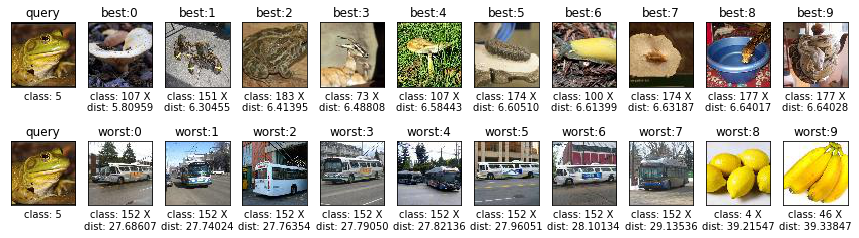

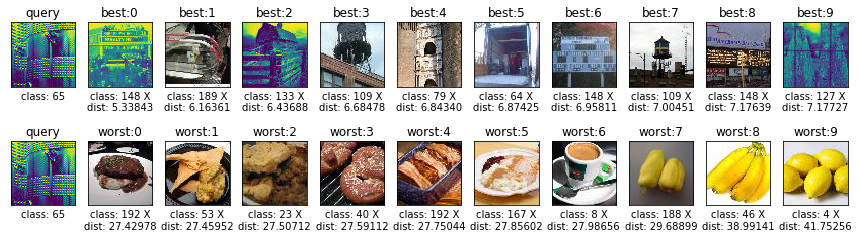

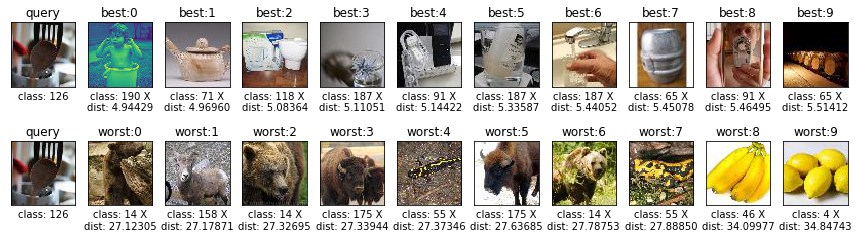

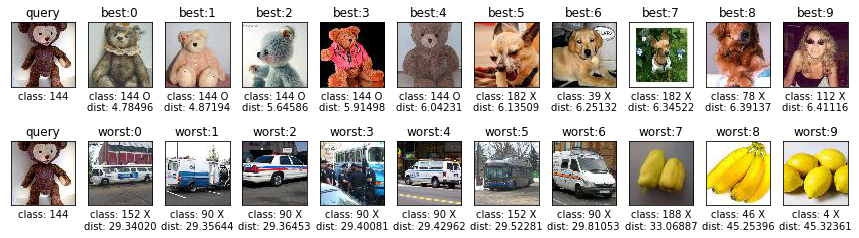

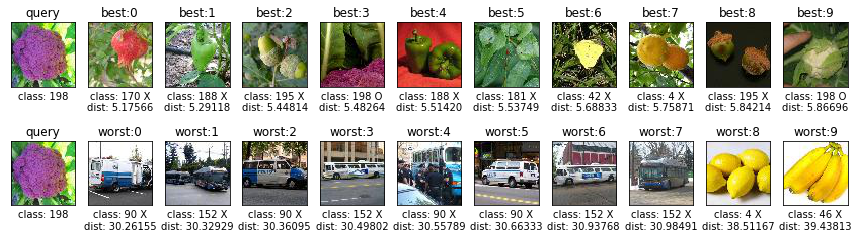

In [194]:
for i in range(len(queries)):
    #print( queries[i,0], query_images[i], queries[i,1] )
    best_for_i = list(map(lambda x:image_hit(*x),zip(best_image_names[i],
                                        best_images[i],
                                        best_distances[i],
                                        best_labels[i])))
    worst_for_i = list(map(lambda x:image_hit(*x),zip(worst_image_names[i],
                                        worst_images[i],
                                        worst_distances[i],
                                        worst_labels[i])))
    
    
    f = display_one( queries[i,0], query_images[i], queries[i,1],best_for_i, worst_for_i)
    f.savefig("query_{}.png".format(i))
    
    